## Trabajo final
#### Informacion Diaria - 1 año

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
import plotly.offline as py
import plotly.graph_objs as go
from scipy import stats 
from scipy.stats import norm
from numpy import cumsum,  log, polyfit,sqrt,std,subtract
from hurst import compute_Hc, random_walk
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

In [61]:
plt.style.use('seaborn-darkgrid')

Obtenemos el dataset de trabajo leyendo el archivo CSV velas_cryptos

In [62]:

ruta= '../Datos/'
extencion= '.csv'
file= 'velas_cryptos'

In [63]:
def lectura_data(ruta, extencion, archivo):
    data= pd.read_csv(ruta+archivo+extencion, low_memory=False)
    return data

In [64]:
data= lectura_data(ruta, extencion, file)


- Estadistica descriptiva
- Selecionar bitcoin y rango de fechas para analizar

In [65]:
# Selecciono la serie de precios diarios del Bitcoin de un año (2020-04-02 a 2021-04-01)

crypto = 'BTCUSD'
fecha_desde = '2020-04-02'
fecha_hasta = '2021-04-01'


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5206 entries, 0 to 5205
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    5206 non-null   object 
 1   open         5206 non-null   float64
 2   close        5206 non-null   float64
 3   min          5206 non-null   float64
 4   max          5206 non-null   float64
 5   volume       5206 non-null   float64
 6   volumeQuote  5206 non-null   float64
 7   crypto       5206 non-null   object 
dtypes: float64(6), object(2)
memory usage: 325.5+ KB


In [67]:
crypto_mask = np.logical_and(np.logical_and(data.crypto == crypto , data.timestamp > fecha_desde ),
                            data.timestamp < fecha_hasta)

In [68]:
df = data[crypto_mask].copy(deep=True)

In [69]:
df.reset_index()

,index,timestamp,open,close,min,max,volume,volumeQuote,crypto
0,2279,2020-04-02T00:00:00.000Z,6646.42,6793.18,6553.21,7223.11,76743.83679,5.181279e+08,BTCUSD
1,2280,2020-04-03T00:00:00.000Z,6792.64,6734.06,6607.61,7041.62,75575.84593,5.143050e+08,BTCUSD
2,2281,2020-04-04T00:00:00.000Z,6735.25,6859.33,6644.30,6996.27,48744.49387,3.296943e+08,BTCUSD
3,2282,2020-04-05T00:00:00.000Z,6856.57,6766.83,6673.67,6896.77,39201.84035,2.659347e+08,BTCUSD
4,2283,2020-04-06T00:00:00.000Z,6767.98,7327.85,6760.83,7355.08,48019.08264,3.387544e+08,BTCUSD
...,...,...,...,...,...,...,...,...,...
359,2638,2021-03-27T00:00:00.000Z,55019.19,55815.33,53974.00,56618.42,24790.46763,1.377285e+09,BTCUSD
360,2639,2021-03-28T00:00:00.000Z,55806.22,55770.77,54700.00,56520.00,51069.08106,2.854025e+09,BTCUSD
361,2640,2021-03-29T00:00:00.000Z,55769.31,57609.40,54913.91,58390.00,36752.02761,2.083135e+09,BTCUSD
362,2641,2021-03-30T00:00:00.000Z,57623.17,58739.99,57068.25,59389.46,33193.86287,1.932955e+09,BTCUSD


In [70]:
df['timestampI'] =  pd.to_datetime(df.timestamp).dt.date

In [71]:
df = df.set_index('timestampI')

In [72]:
df['Retorno_Aritmetico'] = df['close'].pct_change()

In [73]:
df

,timestamp,open,close,min,max,volume,volumeQuote,crypto,Retorno_Aritmetico
timestampI,,,,,,,,,
2020-04-02,2020-04-02T00:00:00.000Z,6646.42,6793.18,6553.21,7223.11,76743.83679,5.181279e+08,BTCUSD,NaN
2020-04-03,2020-04-03T00:00:00.000Z,6792.64,6734.06,6607.61,7041.62,75575.84593,5.143050e+08,BTCUSD,-0.008703
2020-04-04,2020-04-04T00:00:00.000Z,6735.25,6859.33,6644.30,6996.27,48744.49387,3.296943e+08,BTCUSD,0.018602
2020-04-05,2020-04-05T00:00:00.000Z,6856.57,6766.83,6673.67,6896.77,39201.84035,2.659347e+08,BTCUSD,-0.013485
2020-04-06,2020-04-06T00:00:00.000Z,6767.98,7327.85,6760.83,7355.08,48019.08264,3.387544e+08,BTCUSD,0.082907
...,...,...,...,...,...,...,...,...,...
2021-03-27,2021-03-27T00:00:00.000Z,55019.19,55815.33,53974.00,56618.42,24790.46763,1.377285e+09,BTCUSD,0.014431
2021-03-28,2021-03-28T00:00:00.000Z,55806.22,55770.77,54700.00,56520.00,51069.08106,2.854025e+09,BTCUSD,-0.000798
2021-03-29,2021-03-29T00:00:00.000Z,55769.31,57609.40,54913.91,58390.00,36752.02761,2.083135e+09,BTCUSD,0.032968


In [74]:
datos= df.drop(['timestamp', 'open', 'min', 'max', 'volume', 'volumeQuote', 'Retorno_Aritmetico', 'crypto'], axis=1)
datos.sort_values('timestampI', ascending= True, inplace= True)
serie= datos.copy()
display(datos.head(5))
display(datos.tail(5))
display(datos.count())

,close
timestampI,
2020-04-02,6793.18
2020-04-03,6734.06
2020-04-04,6859.33
2020-04-05,6766.83
2020-04-06,7327.85


,close
timestampI,
2021-03-27,55815.33
2021-03-28,55770.77
2021-03-29,57609.40
2021-03-30,58739.99
2021-03-31,58744.00


close    364
dtype: int64

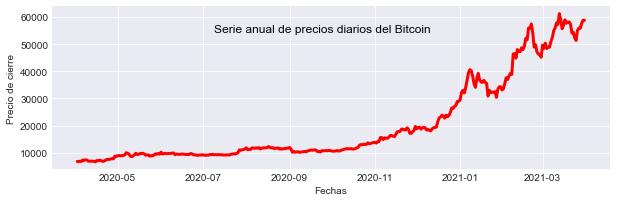

In [75]:
fig= plt.figure(figsize= (10, 3))
fig.suptitle('Serie anual de precios diarios del Bitcoin', y= 0.8, color= 'black')
plt.plot(datos, color= 'red', linewidth= 3)
plt.xlabel('Fechas')
plt.ylabel('Precio de cierre')
plt.show()

In [76]:
# Preparamos los datos:
datos['year'] = [d.year for d in datos.index]
datos['month'] = [d.strftime('%b') for d in datos.index]
datos['day'] = [d.strftime('%d') for d in datos.index]
datos['year_month']= (datos['year'].astype('str') + datos['month'])
meses = (datos['year'].astype('str') + datos['month']).unique()

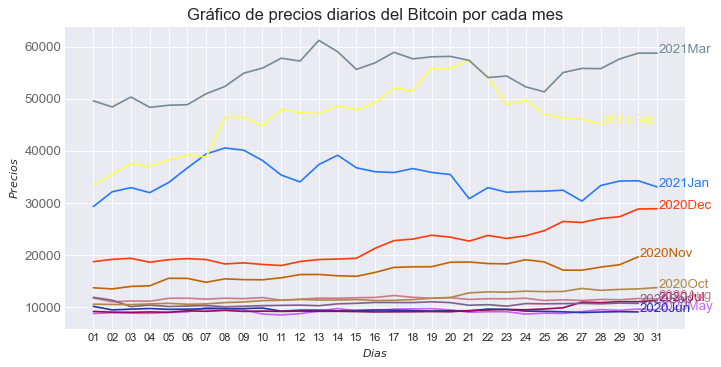

In [77]:
# Preparamos los colores:
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(meses), replace=False)

# Ploteamos
plt.figure(figsize=(10,5), dpi= 80)
for i, y in enumerate(meses):
    if i > 0:        
        plt.plot(datos.loc[datos.year_month==y, :].day, datos.loc[datos.year_month==y, :].close, color=mycolors[i], label=y)
        plt.text(datos.loc[datos.year_month==y, :].shape[0]-.9, datos.loc[datos.year_month==y, 'close'][-1:].values[0], y, fontsize=12, color=mycolors[i])


plt.gca().set(ylabel='$Precios$', xlabel='$Dias$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Gráfico de precios diarios del Bitcoin por cada mes", fontsize=15);

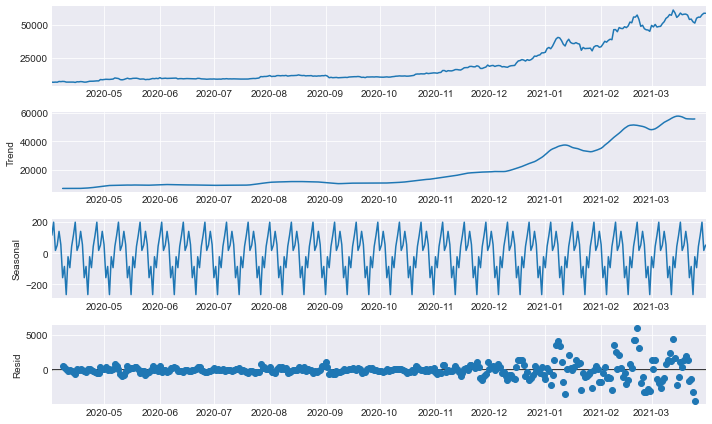

In [78]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
decompose= seasonal_decompose(serie, model = 'additive', period=12)
figure= decompose.plot(observed=True, seasonal=True, trend=True, resid=True, weights=False)
plt.show()

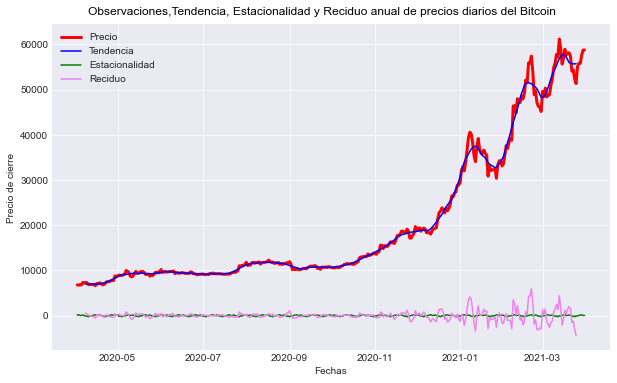

In [79]:
fig= plt.figure(figsize= (10, 6))
fig.suptitle('Observaciones,Tendencia, Estacionalidad y Reciduo anual de precios diarios del Bitcoin', y= 0.92, color= 'black')
plt.plot(serie, color= 'red', linewidth= 3)
plt.plot(decompose.trend, color= 'blue')
plt.plot(decompose.seasonal, color= 'green')
plt.plot(decompose.resid, color= 'violet')
plt.xlabel('Fechas')
plt.ylabel('Precio de cierre')
plt.legend(['Precio', 'Tendencia', 'Estacionalidad', 'Reciduo'], loc= 'best')
plt.show()

In [80]:
# Vamos a crear una dummy de tiempo, es decir indicador numérico para el período de tiempo, para poder modelar 
# la tendencia lineal.
# También vamos a crear una variable que sea la dummy de tiempo elevada al cuadrado para modelar la tendencia cuadrática.

serie["timeIndex"] = pd.Series(np.arange(len(df['close'])), index=df.index)
serie["timeIndex_sq"] = serie["timeIndex"]**2

In [81]:
# Armamos los conjuntos de entrenaminto y test
from sklearn.model_selection import train_test_split

serie_train, serie_test= train_test_split(serie, test_size=12, random_state=42, shuffle= False)

Verificamos la continuidad entre los sets de entrenamiento y de testeo por haber usado el parametro shuffle

In [82]:
# Vemos los ultmos datos del set de entrenamiento
serie_train.tail()

,close,timeIndex,timeIndex_sq
timestampI,,,
2021-03-15,55626.00,347,120409
2021-03-16,56900.79,348,121104
2021-03-17,58907.03,349,121801
2021-03-18,57649.47,350,122500
2021-03-19,58038.24,351,123201


In [83]:
# Vemos los primeros datos del set de testeo
serie_test.head()

,close,timeIndex,timeIndex_sq
timestampI,,,
2021-03-20,58121.54,352,123904
2021-03-21,57352.08,353,124609
2021-03-22,54069.05,354,125316
2021-03-23,54358.00,355,126025
2021-03-24,52300.00,356,126736


#### **------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## A partir de esta parte del codigo vamos a implementar los modelos a probar y determinar cual es el que mejor predice

In [84]:
# Implementamos una funcion para calcluar el RMSE que sera la metria que utilizaremos para comparar los modelos
def RMSE(valor_pred, valor_actual):
    mse= (valor_pred - valor_actual)**2
    rmse= np.sqrt(mse.sum() / mse.count())
    return rmse

### Media constante

In [85]:
# Calculamos el promedio
modelo_media_constante= serie_train['close'].mean()

# La prediccion es fija y es la misma para el set de testeo y de entrenamiento
serie_train['media']= modelo_media_constante
serie_test['media']= modelo_media_constante

<AxesSubplot:xlabel='timestampI'>

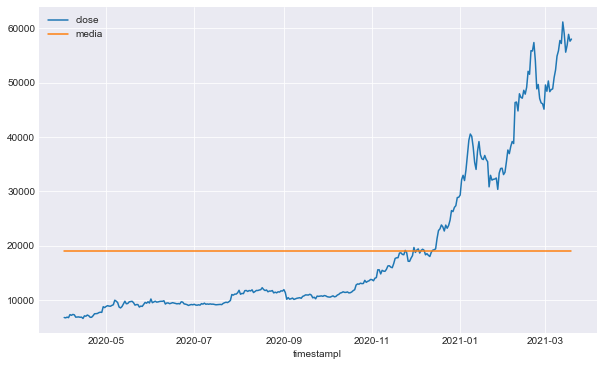

In [86]:
# Graficamos los valores del set de entrenamiento y el modelo
serie_train.plot(kind='line', y= ['close', 'media'])

<AxesSubplot:xlabel='timestampI'>

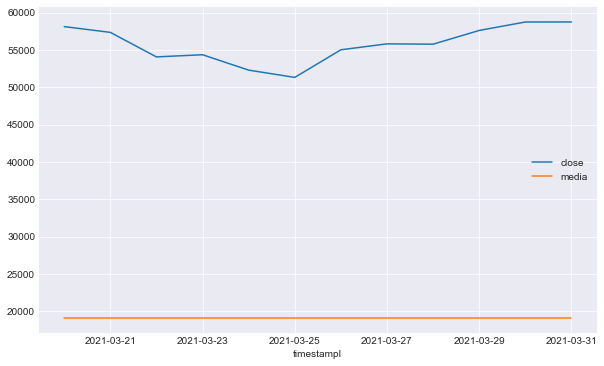

In [87]:
# Graficamos los valores del set de testeo y el modelo
serie_test.plot(kind= 'line', y= ['close', 'media'])

In [88]:
# Calculamos el RMSE del modelo de Media constante
modelo_media_constante_RMSE= RMSE(serie_test.media, serie_test.close)
display(round(modelo_media_constante_RMSE,2))

36780.02

In [89]:
# Guardamos el resultado de RMSE del modelo de Media constate en un DataFreme 'tabla_resultados' para la comparacion final
tabla_resultados= pd.DataFrame({'modelo': ['Media_constate'], 'RMSE': [modelo_media_constante_RMSE]})
tabla_resultados

,modelo,RMSE
0,Media_constate,36780.016687


### Random Walk

In [90]:
serie_train['valor_desplazado']= serie_train.close.shift()

# La primera observacion nos va a quedar en NaN, por lo tanto la reemplazamos por el valor siguiente
serie_train['valor_desplazado'].fillna(method='bfill', inplace= True)
serie_train.head()

,close,timeIndex,timeIndex_sq,media,valor_desplazado
timestampI,,,,,
2020-04-02,6793.18,0,0,19064.033324,6793.18
2020-04-03,6734.06,1,1,19064.033324,6793.18
2020-04-04,6859.33,2,4,19064.033324,6734.06
2020-04-05,6766.83,3,9,19064.033324,6859.33
2020-04-06,7327.85,4,16,19064.033324,6766.83


In [91]:
serie_train.tail()

,close,timeIndex,timeIndex_sq,media,valor_desplazado
timestampI,,,,,
2021-03-15,55626.00,347,120409,19064.033324,59022.44
2021-03-16,56900.79,348,121104,19064.033324,55626.00
2021-03-17,58907.03,349,121801,19064.033324,56900.79
2021-03-18,57649.47,350,122500,19064.033324,58907.03
2021-03-19,58038.24,351,123201,19064.033324,57649.47


In [92]:
# Generamos el desplazamiento en nuestro muestreo target en el set de teseto (lag=1)
serie_test['valor_desplazado_t']= serie_test.close.shift()

#Podemos reemplazar el primer nan con el ultimo valor del set de entrenamiento
serie_test.iloc[0, 2]= serie_train.iloc[-1, 2]
serie_test.head()

,close,timeIndex,timeIndex_sq,media,valor_desplazado_t
timestampI,,,,,
2021-03-20,58121.54,352,123201,19064.033324,NaN
2021-03-21,57352.08,353,124609,19064.033324,58121.54
2021-03-22,54069.05,354,125316,19064.033324,57352.08
2021-03-23,54358.00,355,126025,19064.033324,54069.05
2021-03-24,52300.00,356,126736,19064.033324,54358.00


<AxesSubplot:xlabel='valor_desplazado', ylabel='close'>

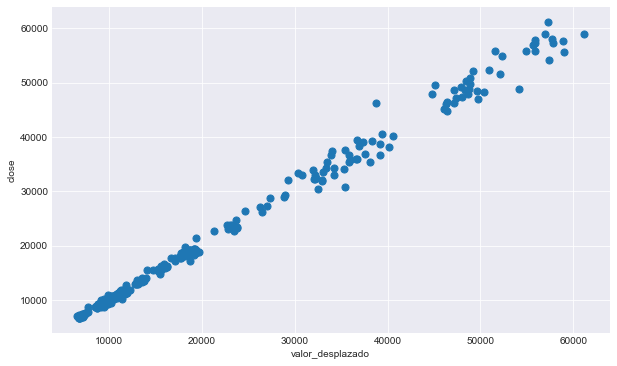

In [93]:
# Hacemos un scatterplot entre las observaciones y su lag de un periodo
serie_train.plot(kind= 'scatter', y= 'close', x= 'valor_desplazado', s= 50)

<AxesSubplot:xlabel='timestampI'>

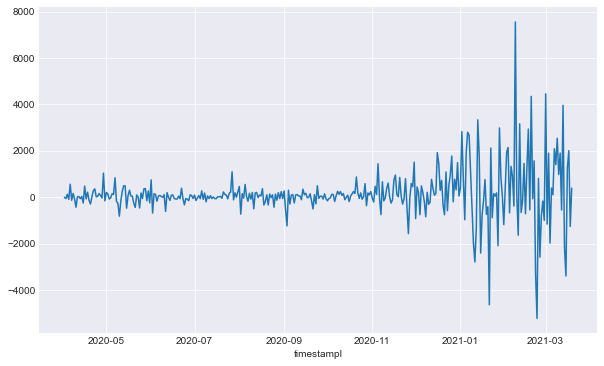

In [94]:
# Ploteamos la diferencia entre nuestro target y lag de un periodo
serie_train['valorDif']= serie_train.close - serie_train.valor_desplazado
serie_train.valorDif.plot()

Como la perturbacion aleatoria tiene media igual a cero, la prediccion del Random Walk va a ser Yt= Yt-1

<AxesSubplot:xlabel='timestampI'>

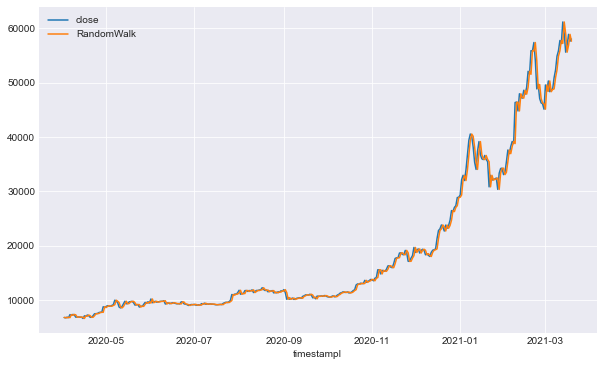

In [95]:
serie_train['RandomWalk']= serie_train.valor_desplazado
serie_train.plot(kind= 'line', y= ['close', 'RandomWalk'])

La prediccion sobre el set de testo es simplemente la ultima observacion registrada en el set de entrenamiento

<AxesSubplot:xlabel='timestampI'>

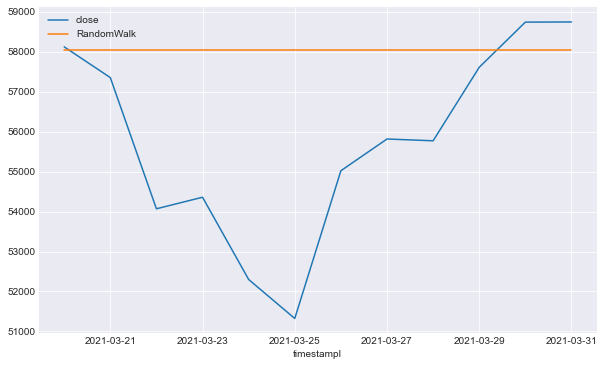

In [96]:
serie_test['RandomWalk']= pd.Series(serie_train['close'][-1], index= serie_test.index)
serie_test.plot(kind='line', y= ['close', 'RandomWalk'])

In [97]:
# Calculamos el RMSE y almacenamos en tabla_resultados
tabla_resultados.loc[1, 'modelo']= 'Random Walk'
tabla_resultados.loc[1, 'RMSE']= RMSE(serie_test.RandomWalk, serie_test.close)
tabla_resultados

,modelo,RMSE
0,Media_constate,36780.016687
1,Random Walk,3267.752272


Vemos que tomar la última observación del set de entranamiento mejoró significaticamente nuestras predicciones en el set de testeo respecto a tomar la media de todo el dataset.

### Tendencia Lineal

Continuaremos trabajando con la tendencia lineal entre close y tiempo, fiteando nuestro modelo de regresión lineal entre "close" y "timestampI". Vamos a usar la API formula de statsmodels. 

In [98]:
serie_train

,close,timeIndex,timeIndex_sq,media,valor_desplazado,valorDif,RandomWalk
timestampI,,,,,,,
2020-04-02,6793.18,0,0,19064.033324,6793.18,0.00,6793.18
2020-04-03,6734.06,1,1,19064.033324,6793.18,-59.12,6793.18
2020-04-04,6859.33,2,4,19064.033324,6734.06,125.27,6734.06
2020-04-05,6766.83,3,9,19064.033324,6859.33,-92.50,6859.33
2020-04-06,7327.85,4,16,19064.033324,6766.83,561.02,6766.83
...,...,...,...,...,...,...,...
2021-03-15,55626.00,347,120409,19064.033324,59022.44,-3396.44,59022.44
2021-03-16,56900.79,348,121104,19064.033324,55626.00,1274.79,55626.00
2021-03-17,58907.03,349,121801,19064.033324,56900.79,2006.24,56900.79


In [99]:
# Importamos las librerias de statmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt

model_linear= smf.ols('close ~ timeIndex', data= serie_train).fit()
model_linear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     873.4
Date:                Wed, 07 Apr 2021   Prob (F-statistic):           3.86e-97
Time:                        16:53:23   Log-Likelihood:                -3648.4
No. Observations:                 352   AIC:                             7301.
Df Residuals:                     350   BIC:                             7308.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1877.6200    818.788     -2.293      0.022   -3487.984    -267.256
timeIndex    119.3257      4.038     29.554      0.000     111.385     127.267
==============================================================================
Omnibus:                       18.822   Durbin-Watson:                   0.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.426
Skew:                           0.512   Prob(JB):                     9.97e-05
Kurtosis:                       2.546   Cond. No.                         405.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

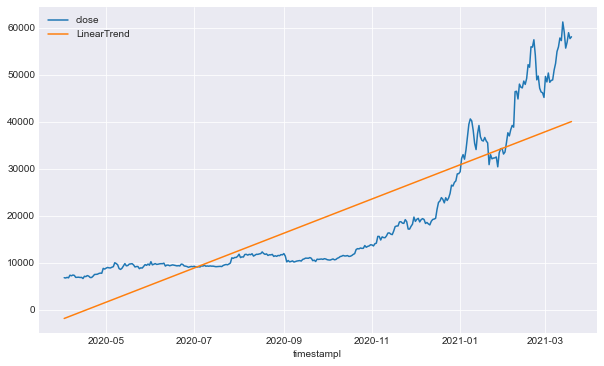

In [100]:
#Vemos la predicciones del modelo sobre el set de entrenamiento
serie_train["LinearTrend"] = model_linear.predict(serie_train.timeIndex)

#Ploteamos los resultados
serie_train.plot(kind = "line", y = ["close","LinearTrend"]);

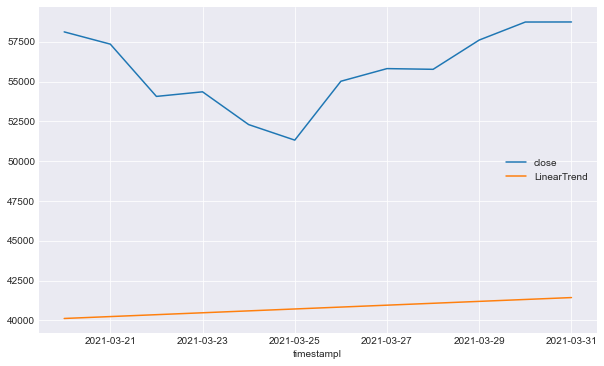

In [101]:
#Vemos la predicciones del modelo sobre el set de testeo
serie_test["LinearTrend"] = model_linear.predict(serie_test.timeIndex)

#Ploteamos los resultados
serie_test.plot(kind = "line", y = ["close","LinearTrend"]);

In [102]:
# Calculamos el RMSE y almacenamos en tabla_resultados 
tabla_resultados.loc[2, "modelo"] = "Tendencia Lineal"
tabla_resultados.loc[2, "RMSE"] = RMSE(serie_test.LinearTrend, serie_test.close)
tabla_resultados

,modelo,RMSE
0,Media_constate,36780.016687
1,Random Walk,3267.752272
2,Tendencia Lineal,15154.960038


La tendencia lineal no logra reducir el RMSE en el set de testeo

### Tendencia Cuadratica

In [103]:
serie.head()

,close,timeIndex,timeIndex_sq
timestampI,,,
2020-04-02,6793.18,0,0
2020-04-03,6734.06,1,1
2020-04-04,6859.33,2,4
2020-04-05,6766.83,3,9
2020-04-06,7327.85,4,16


In [104]:
# Fiteamos nuestro modelo de regresion lineal entre close y timeIndex_sq
modelo_cuadratico = smf.ols('close ~ timeIndex + timeIndex_sq', data = serie_train).fit()

# Observamos el summary del modelo:
modelo_cuadratico.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     2728.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          8.88e-214
Time:                        16:53:24   Log-Likelihood:                -3373.9
No. Observations:                 352   AIC:                             6754.
Df Residuals:                     349   BIC:                             6765.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.325e+04    561.877     23.574      0.000    1.21e+04    1.44e+04
timeIndex     -139.9318      7.395    -18.922      0.000    -154.476    -125.387
timeIndex_sq     0.7386      0.020     36.214      0.000       0.699       0.779
==============================================================================
Omnibus:                        4.391   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                3.764
Skew:                           0.168   Prob(JB):                        0.152
Kurtosis:                       2.621   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='timestampI'>

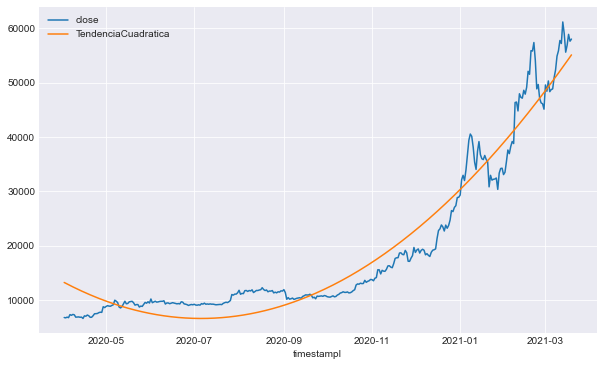

In [105]:
# Vemos las predicciones del modelo sobre el set de entrenamiento.
serie_train["TendenciaCuadratica"] = modelo_cuadratico.predict(serie_train[["timeIndex",\
                                                      "timeIndex_sq"]])
# Ploteamos los resultados de la predicción.
serie_train.plot(kind = "line", y = ["close","TendenciaCuadratica"])

<AxesSubplot:xlabel='timestampI'>

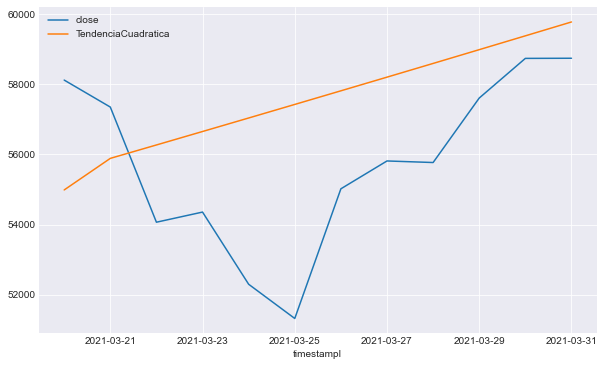

In [106]:
#Vemos las predicciones del modelo sobre el set de testeo.
serie_test["TendenciaCuadratica"] = modelo_cuadratico.predict(serie_test[["timeIndex",\
                                                      "timeIndex_sq"]])
#Ploteamos los resultados de la predicción.
serie_test.plot(kind = "line", y = ["close", "TendenciaCuadratica"])

In [107]:
# Calculamos el RMSE y almacenamos en tabla_resultados 
tabla_resultados.loc[3, "modelo"] = "Tendencia Cuadratica"
tabla_resultados.loc[3, "RMSE"] = RMSE(serie_test.TendenciaCuadratica, serie_test.close)
tabla_resultados

,modelo,RMSE
0,Media_constate,36780.016687
1,Random Walk,3267.752272
2,Tendencia Lineal,15154.960038
3,Tendencia Cuadratica,2981.609394


### Tendencia con transformacion logaritmica

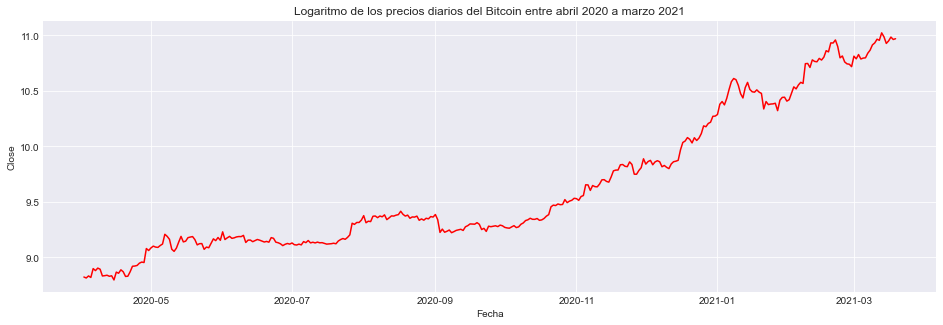

In [108]:
# Hacemos la transformacion logaritmica y vemos si estabiliza la varianza
serie_train['log_close'] = np.log(serie_train['close'])
serie_test['log_close'] = np.log(serie_test['close'])

# Ploteamos la serie logaritmica
title='Logaritmo de los precios diarios del Bitcoin entre abril 2020 a marzo 2021'
plt.figure(figsize=(16,5))
plt.plot(serie_train.index, serie_train['log_close'], color='red')
plt.gca().set(title=title,xlabel= 'Fecha', ylabel='Close')
plt.show()

In [109]:
# Ahora fiteamos nuestro modelo de regresión lineal entre log_close y timeIndex.
modelo_log = smf.ols('log_close ~ timeIndex ', data = serie_train).fit()

# Hacemos el sumario del modelo.
modelo_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_close   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2148.
Date:                Wed, 07 Apr 2021   Prob (F-statistic):          1.94e-151
Time:                        16:53:25   Log-Likelihood:                 11.920
No. Observations:                 352   AIC:                            -19.84
Df Residuals:                     350   BIC:                            -12.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.6335      0.025    345.988      0.000       8.584       8.683
timeIndex      0.0057      0.000     46.349      0.000       0.005       0.006
==============================================================================
Omnibus:                      104.780   Durbin-Watson:                   0.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.372
Skew:                          -0.134   Prob(JB):                     0.000102
Kurtosis:                       1.913   Cond. No.                         405.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# Vemos las predicciones sobre traind y test.
serie_train['modelo_log'] = modelo_log.predict(serie_train[["timeIndex"]])
serie_test['modelo_log'] = modelo_log.predict(serie_test[["timeIndex"]])


In [111]:
# Almacenamos las predicciones del modelo en el set de entrenamiento y testeo luego de haber realizado back-transformation.
serie_train['back_model_log'] = np.exp(serie_train['modelo_log'])
serie_test['back_model_log'] = np.exp(serie_test['modelo_log'])
serie_test.head()

,close,timeIndex,timeIndex_sq,media,valor_desplazado_t,RandomWalk,LinearTrend,TendenciaCuadratica,log_close,modelo_log,back_model_log
timestampI,,,,,,,,,,,
2021-03-20,58121.54,352,123201,19064.033324,NaN,58038.24,40125.012280,54989.107722,10.970292,10.641066,41817.313684
2021-03-21,57352.08,353,124609,19064.033324,58121.54,58038.24,40244.337940,55889.160318,10.956964,10.646769,42056.486831
2021-03-22,54069.05,354,125316,19064.033324,57352.08,58038.24,40363.663600,56271.436583,10.898017,10.652472,42297.027923
2021-03-23,54358.00,355,126025,19064.033324,54069.05,58038.24,40482.989259,56655.190099,10.903347,10.658175,42538.944785
2021-03-24,52300.00,356,126736,19064.033324,54358.00,58038.24,40602.314919,57040.420865,10.864752,10.663878,42782.245284


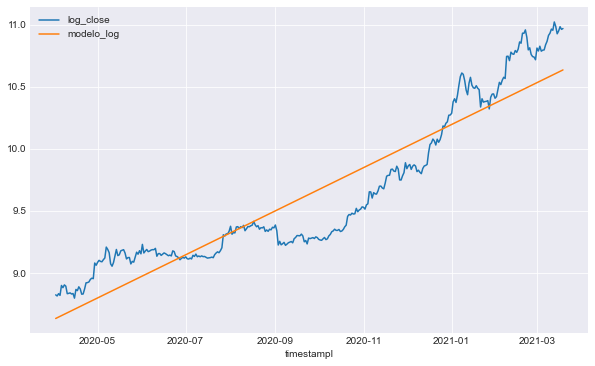

In [112]:
# Ploteamos los resultados de la predicción en el set de entrenamiento sin back-transformation.
serie_train.plot(kind = "line", y = ['log_close', 'modelo_log']);

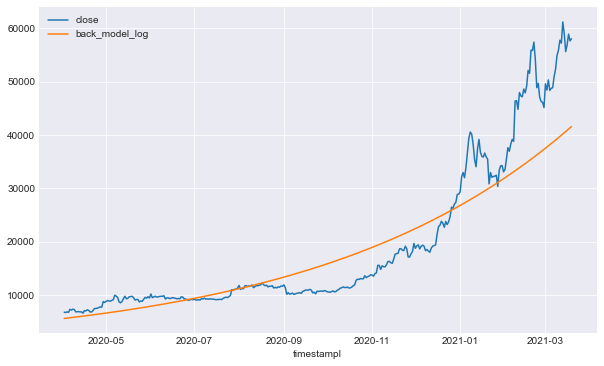

In [113]:
# Ploteamos los resultados de la predicción en el set de entrenamiento con back-transformation.
serie_train.plot(kind = "line", y = ['close', 'back_model_log']);

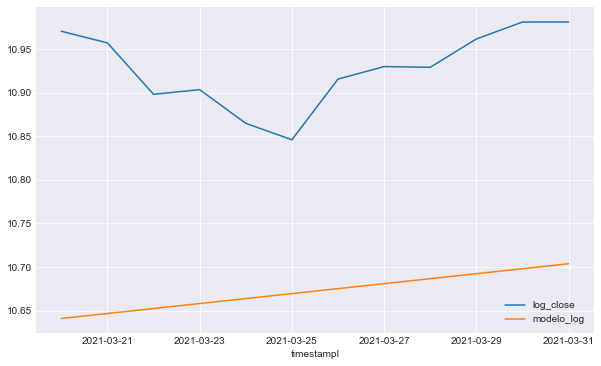

In [114]:
# Ploteamos los resultados de la predicción en el set de testeo sin back-transformation.
serie_test.plot(kind = "line", y = ['log_close', 'modelo_log']);

<AxesSubplot:xlabel='timestampI'>

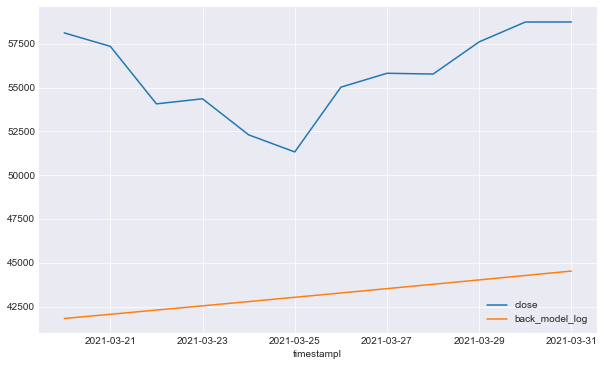

In [115]:
# Ploteamos los resultados de la predicción en el set de testeo con back-transformation.
serie_test.plot(kind = "line", y = ['close', 'back_model_log'])

In [116]:
# Calculamos el RMSE y almacenamos en tabla_resultados 
tabla_resultados.loc[4, "modelo"] = "Transformacion Logaritmica"
tabla_resultados.loc[4, "RMSE"] = RMSE(serie_test['back_model_log'], serie_test['close'])
tabla_resultados

,modelo,RMSE
0,Media_constate,36780.016687
1,Random Walk,3267.752272
2,Tendencia Lineal,15154.960038
3,Tendencia Cuadratica,2981.609394
4,Transformacion Logaritmica,12802.688419


### **No hacemos el calculo de Tendencia con transformación logarítmica + estacionalidad mensual, ya que la serie como se mostro arriva no tiene estacionalidad.**

### Single Exponential Smoothing (suavizado exponencial).

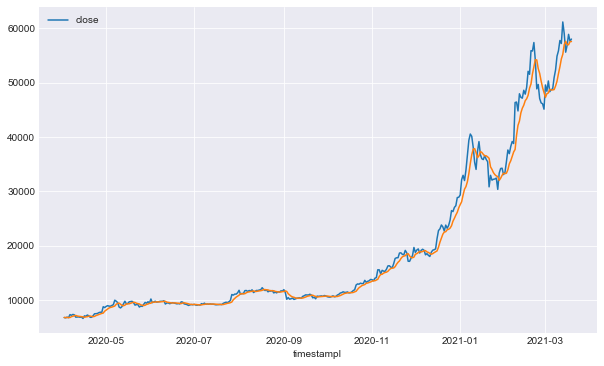

In [117]:
# El modelo es un promedio ponderado entre el precio de cierre (close) actual y los precios anteriores.
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Usamos un factor de suavizado smoothing_level=0.3
modelo_suavizado = SimpleExpSmoothing(serie_train.close).fit(smoothing_level=0.3,\
                                                            optimized=False)
# Ploteamos la serie en entrenamiento y el suavizado exponencial.
serie_train.plot(kind = "line", y = "close")
modelo_suavizado.fittedvalues.plot();


In [118]:
# Aplicamos un split entre train y test para series de tiempo.
from sklearn.model_selection import TimeSeriesSplit 

tscv = TimeSeriesSplit(n_splits=5)

In [119]:
# Definimos una función que aplica 'time series cross validation' para el modelo de suavizado exponencial.
from sklearn.metrics import mean_squared_error

def timeseriesCVscore_exp_smoot(alpha, series):
    """
        Returns error on CV  
        
        params - vector of parameters for optimization
        series - dataset with timeseries
        slen - season length for Holt-Winters model
    """
    # creamos un array de errores:
    errors = []
    
    values = series.values
    
    # instanciamos el objeto que realiza el tscv:
    tscv = TimeSeriesSplit(n_splits=5) 
    
    # Aplicamos cross validation:

    for train, test in tscv.split(values):
    
        model = SimpleExpSmoothing(values[train]).fit(smoothing_level=alpha,\
                                                             optimized=False)
        
        predictions = model.forecast(len(test))
        actual = values[test]
    
        error = mean_squared_error(predictions, actual)
        errors.append(error)
        
    return np.mean(np.array(errors))

In [121]:
alphas = [0.001, 0.01, 0.1, 0.2, 0.3, 0.35, 0.4, 0.5, 0.7]
errors = []

for alpha in alphas:
    error = timeseriesCVscore_exp_smoot(alpha, serie_train.close)
    errors.append(error)

print('Alpha óptimo:', alphas[np.argmin(errors)])

Alpha óptimo: 0.3


In [123]:
# Entrenamos el modelo optimizado:
modelo_suavizado = SimpleExpSmoothing(serie_train.close).fit(smoothing_level=alphas[np.argmin(errors)],\
                                                             optimized=False)

serie_test["Suavizado_simple"] = modelo_suavizado.forecast(12)
serie_test.head()

,close,timeIndex,timeIndex_sq,media,valor_desplazado_t,RandomWalk,LinearTrend,TendenciaCuadratica,log_close,modelo_log,back_model_log,Suavizado_simple
timestampI,,,,,,,,,,,,
2021-03-20,58121.54,352,123201,19064.033324,NaN,58038.24,40125.012280,54989.107722,10.970292,10.641066,41817.313684,57723.563041
2021-03-21,57352.08,353,124609,19064.033324,58121.54,58038.24,40244.337940,55889.160318,10.956964,10.646769,42056.486831,57723.563041
2021-03-22,54069.05,354,125316,19064.033324,57352.08,58038.24,40363.663600,56271.436583,10.898017,10.652472,42297.027923,57723.563041
2021-03-23,54358.00,355,126025,19064.033324,54069.05,58038.24,40482.989259,56655.190099,10.903347,10.658175,42538.944785,57723.563041
2021-03-24,52300.00,356,126736,19064.033324,54358.00,58038.24,40602.314919,57040.420865,10.864752,10.663878,42782.245284,57723.563041


In [124]:
modelo_suavizado_RMSE = RMSE(serie_test["Suavizado_simple"], serie_test.close)
modelo_suavizado_RMSE

3057.607030504361

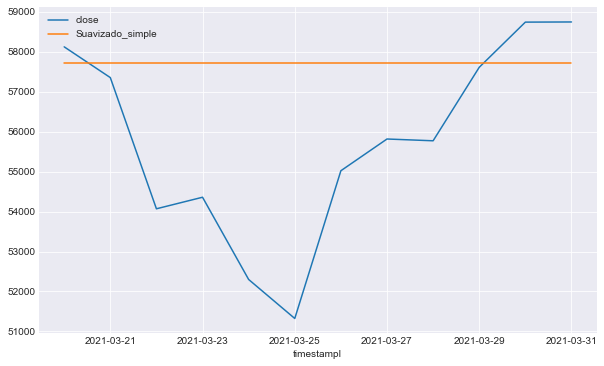

In [125]:
serie_test.plot(kind="line", y = ["close", "Suavizado_simple"]);

In [126]:
# Calculamos el RMSE y almacenamos en tabla_resultados 
tabla_resultados.loc[5, "modelo"] = "Suavizado exponencial simple"
tabla_resultados.loc[5, "RMSE"] = RMSE(serie_test.Suavizado_simple, serie_test.close)
tabla_resultados

,modelo,RMSE
0,Media_constate,36780.016687
1,Random Walk,3267.752272
2,Tendencia Lineal,15154.960038
3,Tendencia Cuadratica,2981.609394
4,Transformacion Logaritmica,12802.688419
5,Suavizado exponencial simple,3057.607031


### Modelo ARIMA sin estacionalidad

In [127]:
# Importamos plots ACF y PACF.
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [129]:
# Calculamos la ACF para close con 20 rezagos.
lag_acf = acf(serie.close, nlags = 20)
lag_acf

array([1.        , 0.98807578, 0.97611926, 0.96450746, 0.95320177,
       0.94218896, 0.9313492 , 0.92178267, 0.91216321, 0.90135517,
       0.89081728, 0.87795445, 0.86452888, 0.85123808, 0.83845855,
       0.82580677, 0.81458799, 0.80381147, 0.79151023, 0.77851477,
       0.76739651])

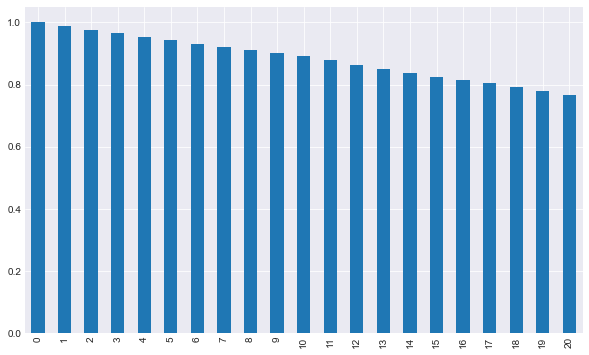

In [130]:
# Almacenamos la ACF en una Serie de Pandas y la ploteamos.
ACF = pd.Series(lag_acf)
ACF.plot(kind = "bar");

In [131]:
# Calculamos la PACF para close con 20 rezagos. Usamos mínimos cuadrádos ordinarios para estimar los parámetros.
lag_pacf = pacf(serie.close, nlags=20, method='ols');

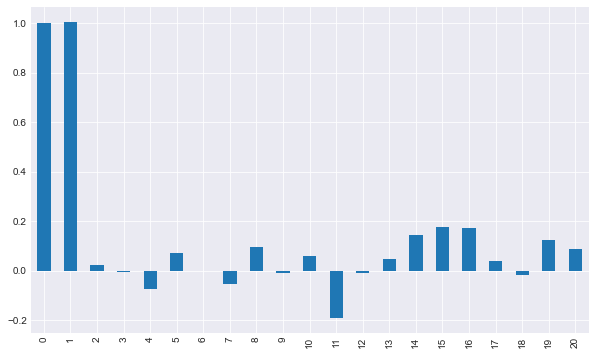

In [132]:
# Almacenamos la PACF en una Serie de Pandas y la ploteamos.
PACF = pd.Series(lag_pacf)
PACF.plot(kind = "bar");

In [133]:
# Vamos a definir una función que va a plotear una serie y nos va a dar 
# información sobre su estacionariedad y sobre sus ACF y PACF.
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """ 
        Plotea la serie de tiempo, el ACF y PACF y el test de Dickey–Fuller
        
        y - serie de tiempo
        lags - cuántos lags incluir para el cálculo de la ACF y PACF
        
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        
        # definimos ejes
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        
        # obtengo el p-value con h0: raiz unitaria presente
        p_value = sm.tsa.stattools.adfuller(y)[1]
        
        ts_ax.set_title('Análisis de la Serie de Tiempo\n Dickey-Fuller: p={0:.5f}'\
                        .format(p_value))
        
        # plot de autocorrelacion
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        # plot de autocorrelacion parcial
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

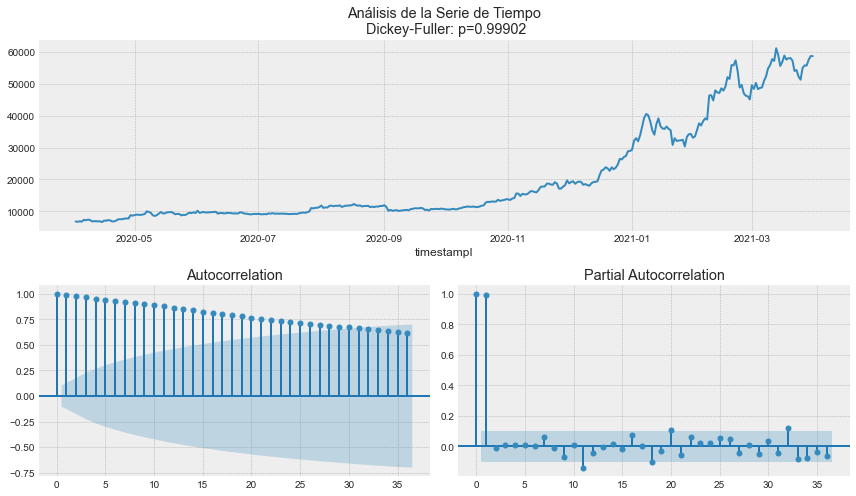

In [134]:
# Corremos la función con nuestra serie close:

tsplot(serie.close, lags=36)

El test de Dickey Fuller arroja un p=0.99902 por lo cual se acepta la hipotesis nula, esto significa que la serie es no estacionaria.
Es por esto que no se puede correr el modelo de ARIMA que es para series estacionarias.

#### ---------------------------------------------------------------------------------------------------

### Conclusion:

In [137]:
tabla_resultados

,modelo,RMSE
0,Media_constate,36780.016687
1,Random Walk,3267.752272
2,Tendencia Lineal,15154.960038
3,Tendencia Cuadratica,2981.609394
4,Transformacion Logaritmica,12802.688419
5,Suavizado exponencial simple,3057.607031


### **El modelo que mejor predice es el de Tendencia Cuadratica.**